# Imports

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

# Function to calculate distance between two vectors / points .

In [2]:
def euclidean_distance(vector1, vector2):
    distance = 0.0
    for i in range(len(vector1)):
        distance += (vector1[i] - vector2[i])**2
        
    return sqrt(distance)

# Function to return the 'K' nearnest neighbours to a given test case/sample

In [3]:
def nearest_neighbours(training_set, testsample, k):
    a = len(training_set[1])-1 
    distances = list()
    for i in training_set:
        d = euclidean_distance(i[0:a],testsample)
        distances.append((i, d)) #enter the training example and its distance from our test case
    distances.sort(key=lambda tup: tup[1]) #sort based on coloum 1 , i.e distance tup means tupple ,(this is the syntax)
    neighbors = []
    #from the sorted list extract the top training examples of top k rows as they are our nearest neighbour
    for i in range(k):
        neighbors.append(distances[i][0]) #row i , coloum 0 , coloum 0 has the features of training example
    return neighbors

# KNN Classifier function: 

    predicts the class label for one given test case/sample

In [4]:
def KNearestNeighbourClassifier(training_set,test_sample,no_of_classes,k):
    nn = nearest_neighbours(training_set,test_sample,k)
    #this is universal , here it creates a dict  1:no. of setosa neighbour 2: no of versicolor neighbour 3:no of virginica
    most_similar = dict.fromkeys(range(1,(no_of_classes+1)), 0)
    
    for negh in nn:
        species = negh[len(negh)-1] #the last coloumn in the neighbours returned has the species entry or label
        if species in most_similar:
            most_similar[species] += 1
        else:
            most_similar[species] = 1
        
    maximum = 0
    k = 0
    for key, value in most_similar.items(): # get the key(species label) whose count is max or most common nearest neighbour
        if value > maximum:
            maximum = value
            k = key  
            
    return k

# Using A Public Dataset 
        
        Dataset used : Iris
        Description :
                     150 rows / examples 
                     5 coloumn (4 features , 1 class label)
                     feature: Sepal-Length	Sepal-Width	Petal-Length	Petal-Width
                     3 classes : Iris-setosa , iris-versicolor , iris-virginica

# Load and Perpare the DataSet according to the requirement of the KNN fucntion

In [5]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Encoding class labels to numerical value
    
    Iris-setosa': 1,'Iris-versicolor': 2,'Iris-virginica' : 3

In [6]:
species = {'Iris-setosa': 1,'Iris-versicolor': 2,'Iris-virginica' : 3}
iris.Species = [species[item] for item in iris.Species]
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.1 KB


In [8]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Seperating Features and Class Labels

In [9]:
iris_features = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
iris_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris_target = iris['Species']
iris_target.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

# Split dataset into Training and Test set

In [11]:
training_features, testing_features, training_labels, testing_labels = train_test_split(iris_features, iris_target,test_size = 0.4, stratify= iris_target, random_state= 42)

In [12]:
training_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
130,7.4,2.8,6.1,1.9
6,4.6,3.4,1.4,0.3
94,5.6,2.7,4.2,1.3
96,5.7,2.9,4.2,1.3
26,5.0,3.4,1.6,0.4


In [13]:
training_labels.head()

130    3
6      1
94     2
96     2
26     1
Name: Species, dtype: int64

In [14]:
print(len(training_features))
print(len(training_labels))
print(len(testing_features))
print(len(testing_labels))
print(type(training_features))
print(type(training_labels))
print(type(testing_features))
print(type(testing_labels))

90
90
60
60
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# As the split data is still a pandas DataFrame and Series
     we convert them into numpy arrays for calcution purpose

In [15]:
training_features_array = training_features.values
training_labels_array = training_labels.values
testing_features_array = testing_features.values
print(type(training_features_array))
print(type(training_labels_array))
print(type(testing_features_array))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
testing_features_array

array([[5. , 3.5, 1.3, 0.3],
       [5.9, 3. , 4.2, 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [5. , 3.3, 1.4, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5.4, 3.4, 1.7, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5. , 2.3, 3.3, 1. ],
       [6.9, 3.1, 5.1, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [6. , 3.4, 4.5, 1.6],
       [6. , 2.9, 4.5, 1.5],
       [6.3, 2.8, 5.1, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.2, 3.4, 5.4, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.7, 3. , 5. , 1.7],
       [5.1, 2.5, 3. , 1.1],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.7, 5.3, 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [6.4, 2.8, 5.6, 2.2],
       [6.5, 3. , 5.5, 1.8],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 2.7, 4.9, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [6.7, 3. , 5.2, 2.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3

In [17]:
testing_labels

40     1
61     2
18     1
49     1
106    3
20     1
69     2
93     2
141    3
104    3
85     2
78     2
133    3
127    3
2      1
1      1
35     1
42     1
148    3
122    3
77     2
98     2
107    3
111    3
51     2
132    3
116    3
36     1
123    3
23     1
145    3
97     2
134    3
21     1
22     1
108    3
11     1
55     2
7      1
147    3
56     2
144    3
66     2
63     2
67     2
87     2
53     2
10     1
29     1
138    3
14     1
75     2
58     2
57     2
102    3
140    3
43     1
84     2
38     1
28     1
Name: Species, dtype: int64

# We need the training set to also contain their respective labels 

    so for prediction purpose we merge the training data and  training labels 
    note: no need to merge the test data with test labels
    
    (we can aslo compare this value with the dataframe version of training examples)

In [18]:
training_set = np.column_stack((training_features_array,training_labels_array))
training_set[0:5]

array([[7.4, 2.8, 6.1, 1.9, 3. ],
       [4.6, 3.4, 1.4, 0.3, 1. ],
       [5.6, 2.7, 4.2, 1.3, 2. ],
       [5.7, 2.9, 4.2, 1.3, 2. ],
       [5. , 3.4, 1.6, 0.4, 1. ]])

# Making predictions and checking accuracy:

    Using our training & test sets along with the Classifier function with a ranodm value of k
    where, k: number of nearest neighbors to consider

In [19]:
label_count = testing_labels.nunique()
test_set_predictions=[]
for i in testing_features_array:
    pred = KNearestNeighbourClassifier(training_set,i,k=2,no_of_classes=label_count)
    test_set_predictions.append(pred)

In [20]:
print("Test set accuracy with 2 nearest neighbours = %.3f " %(accuracy_score(testing_labels, test_set_predictions)))

Test set accuracy with 2 nearest neighbours = 0.933 


# Optimizing the model :

    checking accuracy of model on training and test sets with multiple value of k to prevent 
    overfitting or underfitting of model

In [21]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,21) # 1 inclusive 21 exclusive so  1 - 20

for n in neighbors_settings:
    test_set_predictions=[]
    for i in testing_features_array:
        pred = KNearestNeighbourClassifier(training_set,i,k=n,no_of_classes=label_count)
        test_set_predictions.append(pred)
    
    test_accuracy.append(accuracy_score(testing_labels, test_set_predictions))
    
    training_set_predictions=[]
    for i in training_features_array:
        pred = KNearestNeighbourClassifier(training_set,i,k=n,no_of_classes=label_count)
        training_set_predictions.append(pred)
    
    training_accuracy.append(accuracy_score(training_labels, training_set_predictions))

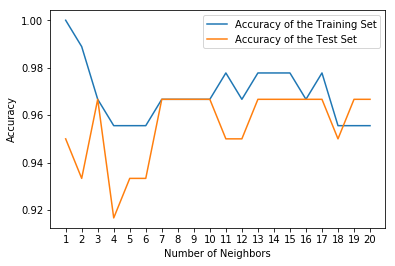

In [22]:
plt.plot(neighbors_settings, training_accuracy, label = 'Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label = 'Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xticks(neighbors_settings)
plt.xlabel('Number of Neighbors')
plt.legend()

# Inference

    in the graph we see the minimum value of k when the training and testing accuracy is identical
    is when k (no of nearset neighbour) = 3 or 7
    so we select the Optimal value of 'k' for this dataset as 3
    
    Then using this value of 'k'  we make our final Predictions and check our classifier's performance

In [23]:
Final_predictions=[]
optimal_nearest_neighbour=3
for i in testing_features_array:
    pred = KNearestNeighbourClassifier(training_set,i,k=optimal_nearest_neighbour,no_of_classes=label_count)
    Final_predictions.append(pred)
    
print("Test set accuracy with optimal nearest neighbour : %d is = %.3f " %(optimal_nearest_neighbour,(accuracy_score(testing_labels, Final_predictions))))

Test set accuracy with optimal nearest neighbour : 3 is = 0.967 


# Confusion Matrix And calculating Precision Recall and F1 Score

            In the Confusion Matrix : 'Iris-setosa': 1,'Iris-versicolor': 2,'Iris-virginica' : 3 (class Labels)
            Row represents actual Species while the columns represents the predicted Species

            1st row : 1st column :Actual Species = Iris-Setosa ; Predicted Species = Iris-Setosa
            1st row : 2nd column :Actual Species = Iris-Setosa ; Predicted Species = Iris-versicolor
            1st row : 3rd column :Actual Species = Iris-Setosa ; Predicted Species = Iris-virginica

            2nd row : 1st column :Actual Species = Iris-versicolor ; Predicted Species = Iris-Setosa
            2nd row : 2nd column :Actual Species = Iris-versicolor ; Predicted Species = Iris-versicolor
            2nd row : 3rd column :Actual Species = Iris-versicolor ; Predicted Species = Iris-virginica

            3rd row : 1st column :Actual Species = Iris-virginica ; Predicted Species = Iris-Setosa
            3rd row : 2nd column :Actual Species = Iris-virginica ; Predicted Species = Iris-versicolor
            3rd row : 3rd column :Actual Species = Iris-virginica ; Predicted Species = Iris-virginica

In [24]:
cm  = confusion_matrix(testing_labels,Final_predictions )
print(cm)

[[20  0  0]
 [ 0 20  0]
 [ 0  2 18]]


# Precision Recall & F1 Score:

        Precison = True Postive/(Total predicted Positive) || True Postive/(True Positive + False Positive)
                   Precision talks about how precise/accurate the model is, i.e. out of total predicted positive,
                   how many of them are actual positive.

        Recall = True Positive/(Total actual Positive) || True Postive/(True Positive + False Negetive)
                 Recall calculates how many of the Actual Positives the model captures by labeling it 
                 as Positive (True Positive)

        F1 Score = (2 * Precision * Recall) / (Precision + Recall)

In [25]:
precision = precision_score(testing_labels,Final_predictions, average='macro')
print('Precision of the KNN Model : %.3f' % precision)
recall = recall_score(testing_labels,Final_predictions, average='macro')
print('Recall of the KNN Model : %.3f' %recall)
f1 = f1_score(testing_labels,Final_predictions, average='macro')
print('F1 Score of the KNN Model : %.3f' %f1)

Precision of the KNN Model : 0.970
Recall of the KNN Model : 0.967
F1 Score of the KNN Model : 0.967


# Comparing predicted species and actual species of test set side by side

In [26]:
Id = testing_labels.index
predicted_species = pd.DataFrame(Final_predictions, Id , columns = ['Predicted_Species'])
actual_species = pd.DataFrame(testing_labels.values, Id, columns = ['Actual_Species'])
predictions_comparions=actual_species.merge(predicted_species, how = 'outer', left_index = True, right_index = True)
predictions_comparions

,Actual_Species,Predicted_Species
40,1,1
61,2,2
18,1,1
49,1,1
106,3,2
20,1,1
69,2,2
93,2,2
141,3,3
104,3,3


# Using snthesized Dataset

    using numpy's arrange method & numpy's random normal generator to create 2 features x , y
    random normal : gaussian distribution with mean 0 and unit std deviation.
    x : simply a sequence generated using arrange(between a given range and increment step)
    y : k + random_normsl(mean= 0 nd std_div 1) * 2
        
    for class labels we simply generate 'n' dimensional vector of ones , then a multiply them with a scaler value
    where n is the size of x and y(number of rows/examples)
    
    note: remember to set random seed , otherwise each time we run the code y(the random num generator) will give
          different values hence dataset will be different each time we run the code.
          so to allow reproduceability of dataset and results random seed must be fixed 

# creating a synthetic dataset

In [27]:
np.random.seed(631) #123 , 631 , 852 seeds which give best visualization

x_cluster_1 = np.arange(1, 6, 0.1)
y_cluster_1 = 1 + (np.random.normal(0, 1, len(x_cluster_1))) * 2
label1= np.ones((len(x_cluster_1),1),dtype=int).flatten()

x_cluster_2 = np.arange(8, 14, 0.1)
y_cluster_2 = 2 + (np.random.normal(0, 1, len(x_cluster_2))) * 2
label2= 2 * np.ones((len(x_cluster_2),1),dtype=int).flatten()

x_cluster_3 = np.arange(3, 10, 0.1)
y_cluster_3 = 7 + (np.random.normal(0, 1, len(x_cluster_3))) * 2
label3=  3 * np.ones((len(x_cluster_3),1),dtype=int).flatten()

x = np.concatenate([x_cluster_1, x_cluster_2, x_cluster_3])
y = np.concatenate([y_cluster_1, y_cluster_2, y_cluster_3])
class_label = np.concatenate([label1, label2, label3])
data = np.column_stack((x,y,class_label))
print(data.shape)
data

(180, 3)


array([[ 1.        , -1.78160415,  1.        ],
       [ 1.1       ,  2.44965841,  1.        ],
       [ 1.2       ,  5.79232346,  1.        ],
       [ 1.3       ,  3.69741631,  1.        ],
       [ 1.4       ,  0.95470144,  1.        ],
       [ 1.5       , -0.62497548,  1.        ],
       [ 1.6       , -0.52572064,  1.        ],
       [ 1.7       , -0.55278717,  1.        ],
       [ 1.8       ,  3.02928232,  1.        ],
       [ 1.9       , -0.037764  ,  1.        ],
       [ 2.        , -1.03307633,  1.        ],
       [ 2.1       ,  0.80881169,  1.        ],
       [ 2.2       ,  4.58126329,  1.        ],
       [ 2.3       ,  3.93284131,  1.        ],
       [ 2.4       ,  3.31801691,  1.        ],
       [ 2.5       ,  1.64372177,  1.        ],
       [ 2.6       , -0.66452529,  1.        ],
       [ 2.7       ,  2.05836081,  1.        ],
       [ 2.8       , -0.15192471,  1.        ],
       [ 2.9       ,  0.33504038,  1.        ],
       [ 3.        ,  0.14979615,  1.   

# Plot the dataset to visualize

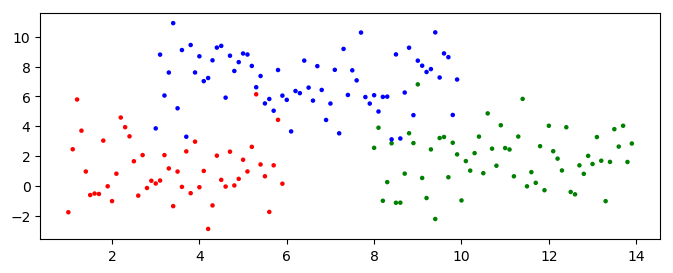

In [28]:
#as index strats from 0 but we require from 1 , so placed black for class 0(which deosnt exist)
colors = ['black','r', 'g','b']
f = lambda x: colors[int(x)]
label_color = list(map(f, class_label))  # so red : class 1 , blue : class 2 , green: class 3

my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 300/my_dpi), dpi = my_dpi)

plt.scatter(data[:, 0], data[:, 1], s = 5, color = label_color)

# The model require training set and test set along with number unqiue entry in class labels or simply number of classes
    
    preparing the dataset according to requirement

In [29]:
x = data[:,[0,1]]
x

array([[ 1.        , -1.78160415],
       [ 1.1       ,  2.44965841],
       [ 1.2       ,  5.79232346],
       [ 1.3       ,  3.69741631],
       [ 1.4       ,  0.95470144],
       [ 1.5       , -0.62497548],
       [ 1.6       , -0.52572064],
       [ 1.7       , -0.55278717],
       [ 1.8       ,  3.02928232],
       [ 1.9       , -0.037764  ],
       [ 2.        , -1.03307633],
       [ 2.1       ,  0.80881169],
       [ 2.2       ,  4.58126329],
       [ 2.3       ,  3.93284131],
       [ 2.4       ,  3.31801691],
       [ 2.5       ,  1.64372177],
       [ 2.6       , -0.66452529],
       [ 2.7       ,  2.05836081],
       [ 2.8       , -0.15192471],
       [ 2.9       ,  0.33504038],
       [ 3.        ,  0.14979615],
       [ 3.1       ,  0.34928182],
       [ 3.2       ,  2.05660839],
       [ 3.3       ,  1.16209368],
       [ 3.4       , -1.37170771],
       [ 3.5       ,  0.95188683],
       [ 3.6       , -0.07857821],
       [ 3.7       ,  2.30600123],
       [ 3.8       ,

In [30]:
y = data[:,2]
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,stratify=y,random_state = 66)

In [32]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))
print(type(X_train))
print(type(Y_train))
print(type(X_test))
print(type(Y_test))

135
135
45
45
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# lets visualize the actual labels of our test set

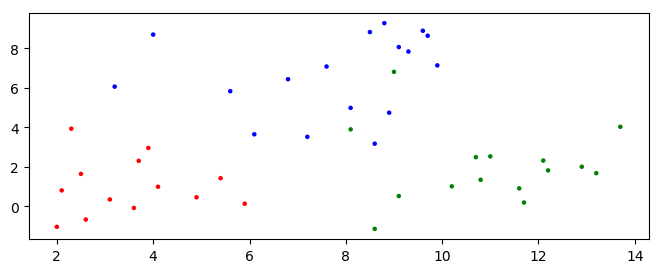

In [33]:
colors = ['black','r', 'g','b'] # as index strats from 0 but we require from 1 , so placed black for class 0(which deosnt exist)
f = lambda x: colors[int(x)]
label_color = list(map(f, Y_test))  # so red : class 1 , blue : class 2 , green: class 3

my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 300/my_dpi), dpi = my_dpi)

plt.scatter(X_test[:, 0], X_test[:, 1], s = 5, color = label_color)

# We need the training set to also contain their respective labels 

    so for prediction purpose we merge the training data and  training labels 
    note: no need to merge the test data with test labels
    
    (we can aslo compare this value with the dataframe version of training examples)

In [34]:
syn_training_set = np.column_stack((X_train,Y_train))
print(syn_training_set.shape)
syn_training_set[0:5]

(135, 3)


array([[ 4.3       ,  8.42373243,  3.        ],
       [11.8       ,  2.65634518,  2.        ],
       [ 4.1       ,  7.02564878,  3.        ],
       [12.5       , -0.41877849,  2.        ],
       [ 9.2       ,  7.64041939,  3.        ]])

# Making predictions and checking accuracy:

    Using our training & test sets along with the Classifier function with a ranodm value of k
    k: number of nearest neighbor to consider

In [35]:
syn_label_count = len(np.unique(Y_test))
test_set_predictions=[]
for i in X_test:
    pred = KNearestNeighbourClassifier(syn_training_set,i,k=2,no_of_classes=syn_label_count)
    test_set_predictions.append(pred)

In [36]:
print("Test set accuracy with 2 nearest neighbours = %.3f " %(accuracy_score(Y_test, test_set_predictions)))

Test set accuracy with 2 nearest neighbours = 0.889 


# Optimizing the model :

    checking accuracy of model on training and test sets with multiple value of k to prevent 
    overfitting or underfitting of model

In [37]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,21) # 1 inclusive 21 exclusive so  1 - 20

for n in neighbors_settings:
    test_set_predictions=[]
    for i in X_test:
        pred = KNearestNeighbourClassifier(syn_training_set,i,k=n,no_of_classes=syn_label_count)
        test_set_predictions.append(pred)
    
    test_accuracy.append(accuracy_score(Y_test, test_set_predictions))
    
    training_set_predictions=[]
    for i in X_train:
        pred = KNearestNeighbourClassifier(syn_training_set,i,k=n,no_of_classes=syn_label_count)
        training_set_predictions.append(pred)
    
    training_accuracy.append(accuracy_score(Y_train, training_set_predictions))

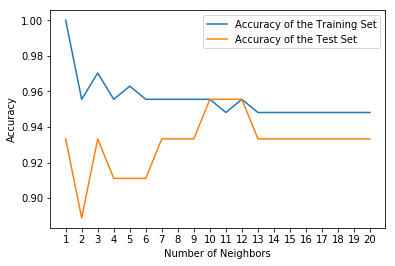

In [38]:
plt.plot(neighbors_settings, training_accuracy, label = 'Accuracy of the Training Set')
plt.plot(neighbors_settings, test_accuracy, label = 'Accuracy of the Test Set')
plt.xticks(neighbors_settings)
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

# Inference

    in the graph we see the minimum value of k when the training and testing accuracy is identical
    is when k (no of nearset neighbour) = 10
    so we select the Optimal value of 'k' for this dataset as 10
    
    Then using this value of 'k'  we make our final Predictions and check our classifier's performance

In [39]:
Final_predictions=[]
optimal_nearest_neighbour=10
for i in X_test:
    pred = KNearestNeighbourClassifier(syn_training_set,i,k=optimal_nearest_neighbour,no_of_classes=syn_label_count)
    Final_predictions.append(pred)
    
print("Test set accuracy with optimal nearest neighbour : %d is = %.3f " %(optimal_nearest_neighbour,(accuracy_score(Y_test, Final_predictions))))

Test set accuracy with optimal nearest neighbour : 10 is = 0.956 


# Confusion Matrix And calculating Precision Recall and F1 Score

            In the Confusion Matrix : 'Red/1': 1,'Blue/2': 2,'Green/3' : 3 (class Labels)
            Row represents actual Label while the columns represents the predicted label

            1st row : 1st column :Actual label = Red / label 1 ; Predicted label = Red / label 1
            1st row : 2nd column :Actual label = Red / label 1 ; Predicted label = Blue / label 2
            1st row : 3rd column :Actual label = Red / label 1 ; Predicted label = Green / label 3

            2nd row : 1st column :Actual label = Blue / label 2 ; Predicted label = Red / label 1
            2nd row : 2nd column :Actual label = Blue / label 2 ; Predicted label = Blue / label 2
            2nd row : 3rd column :Actual label = Blue / label 2 ; Predicted label = Green / label 3

            3rd row : 1st column :Actual label = Green / label 3 ; Predicted label = Red / label 1
            3rd row : 2nd column :Actual label = Green / label 3 ; Predicted label = Blue / label 2
            3rd row : 3rd column :Actual label = Green / label 3 ; Predicted label = Green / label 3

In [40]:
cm  = confusion_matrix(Y_test,Final_predictions )
print(cm)

[[13  0  0]
 [ 0 14  1]
 [ 0  1 16]]


In [41]:
precision = precision_score(Y_test,Final_predictions, average='macro')
print('Precision of the KNN Model : %.3f' % precision)
recall = recall_score(Y_test,Final_predictions, average='macro')
print('Recall of the KNN Model : %.3f' %recall)
f1 = f1_score(Y_test,Final_predictions, average='macro')
print('F1 Score of the KNN Model : %.3f' %f1)

Precision of the KNN Model : 0.958
Recall of the KNN Model : 0.958
F1 Score of the KNN Model : 0.958


# Ploting the predicted results
    
    Red : class / label : 1
    Blue : class / label : 2
    Green : class / label : 3

Text(0.5,1,'Predicted class ; Red :1 , Blue: 2 , Green: 3')

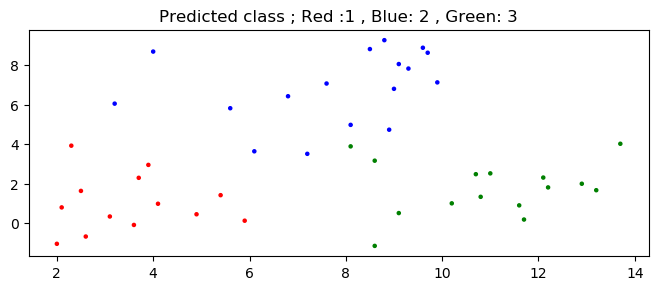

In [42]:
colors = ['black','r', 'g','b'] # as index strats from 0 but we require from 1 , so placed black for class 0(which deosnt exist)
f = lambda x: colors[int(x)]
label_color = list(map(f, Final_predictions))  # so red : class 1 , blue : class 2 , green: class 3

my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 300/my_dpi), dpi = my_dpi)

plt.scatter(X_test[:, 0], X_test[:, 1], s = 5, color = label_color)
plt.title("Predicted class ; Red :1 , Blue: 2 , Green: 3")

# Comapring Actual Labels with Predicted Labels

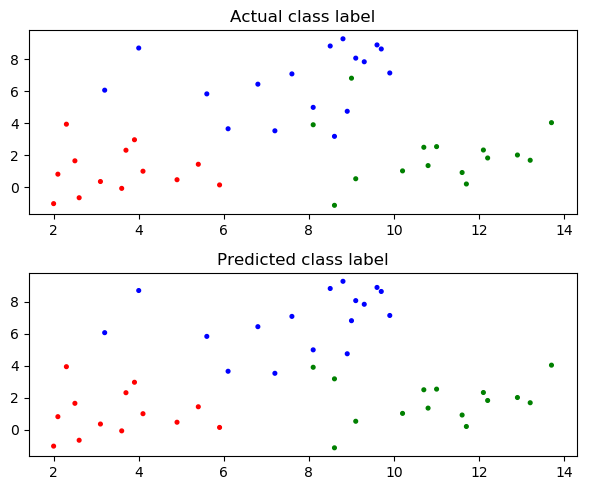

In [43]:
actual_label = list(map(f, Y_test))  # so red : class 1 , blue : class 2 , green: class 3
predicted_label = list(map(f, Final_predictions))  # so red : class 1 , blue : class 2 , green: class 3

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(600/my_dpi, 500/my_dpi), dpi = my_dpi )

ax1.scatter(X_test[:, 0], X_test[:, 1], s = 7, color = actual_label)
ax1.set_title('Actual class label')
ax2.scatter(X_test[:, 0], X_test[:, 1], s = 7, color = predicted_label)
ax2.set_title('Predicted class label')

fig.tight_layout()  #prevents overlapping of plots